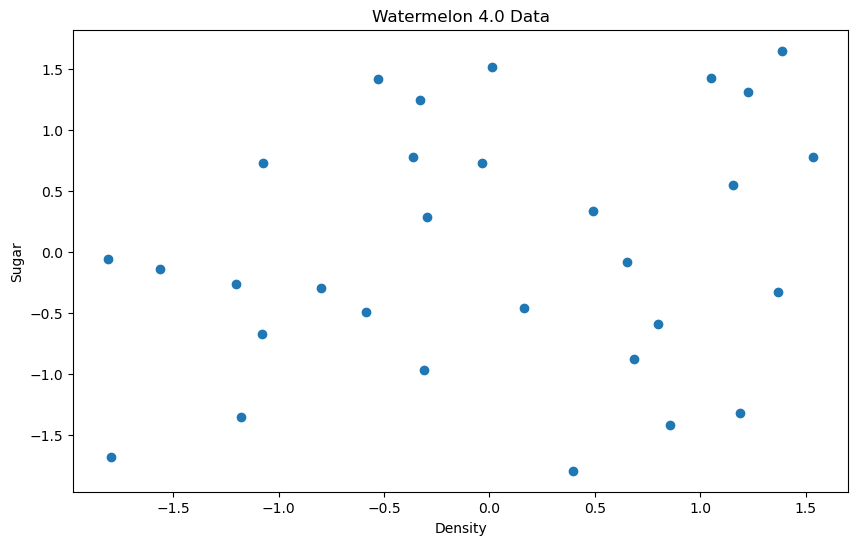

In [1]:
####################################################
# Step 1: Import Packages, Functions, and Classes
####################################################
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import Voronoi, voronoi_plot_2d
import itertools

# %%
###############################################################################
#                             CLUSTERING FOR WATERMELON DATA
###############################################################################

####################################################
# Step 2: Get Data and transform the columns
####################################################

raw_data = pd.read_csv("watermelon_4.csv",encoding='utf-16le')
df = raw_data

# Select relevant features
x = df[['density', 'sugar']]

# Standardize features
scaler = StandardScaler()
x = scaler.fit_transform(x)
X = pd.DataFrame(x, columns=['density', 'sugar'])

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X['density'], X['sugar'])
plt.xlabel("Density")
plt.ylabel("Sugar")
plt.title("Watermelon 4.0 Data")
plt.show()

First / Last values  initial centroids 
 [[ 0.92492379 -0.05821216]
 [-0.80930832  0.05093564]] 



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


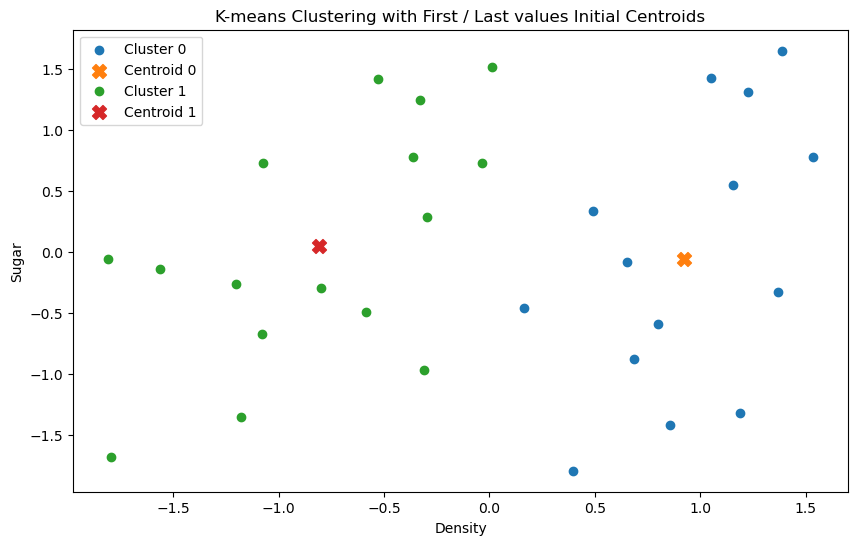

Min / Max values  initial centroids 
 [[-0.45785152 -0.72657913]
 [ 0.52325888  0.83037615]] 



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


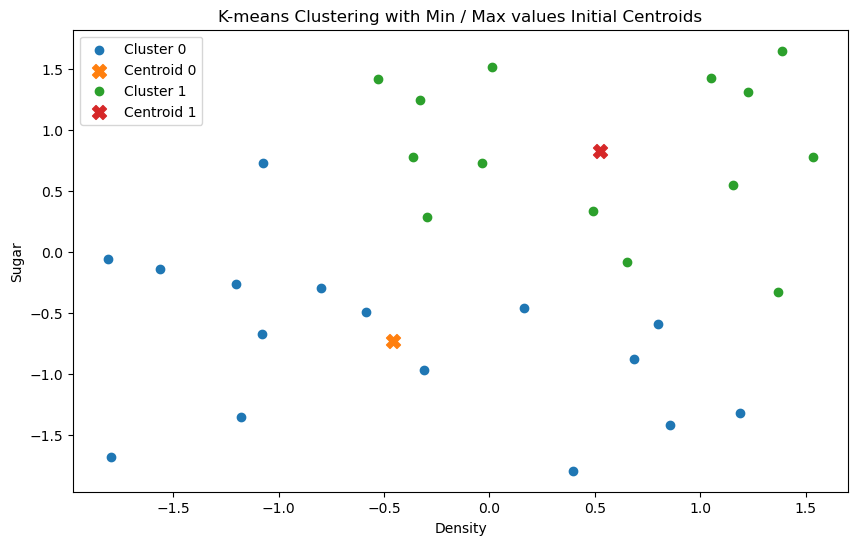

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random  initial centroids 
 [[-0.4168679  -0.82395704]
 [ 0.4168679   0.82395704]] 



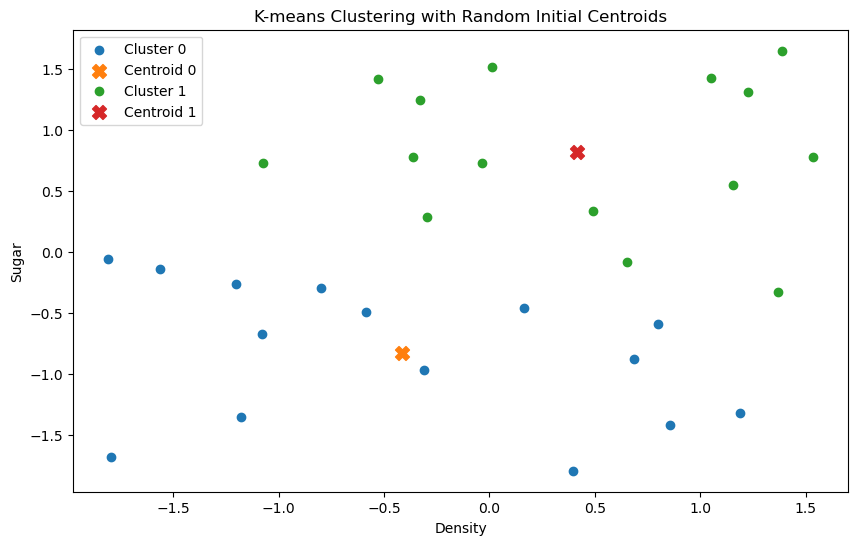

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2  Clusters 
 [[ 0.4168679   0.82395704]
 [-0.4168679  -0.82395704]] 



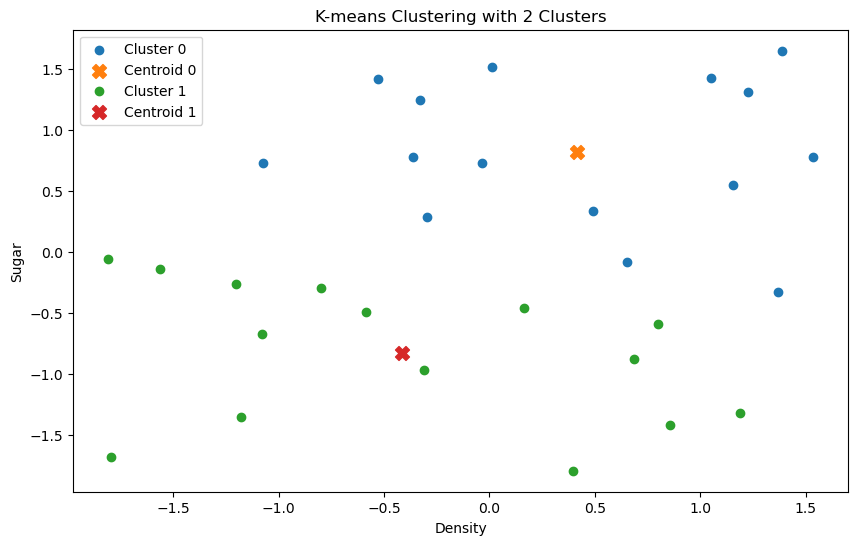

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3  Clusters 
 [[ 0.44184639  1.00305023]
 [ 0.76299841 -0.85849186]
 [-1.1406144  -0.51686679]] 



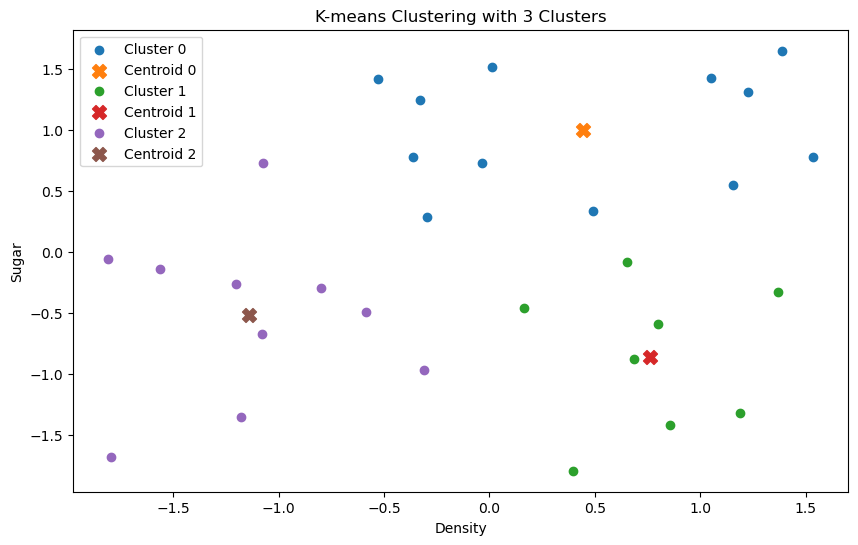

4  Clusters 
 [[ 0.76299841 -0.85849186]
 [-0.37362783  0.95967538]
 [-1.14817092 -0.65586193]
 [ 1.1408243   1.00882743]] 



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


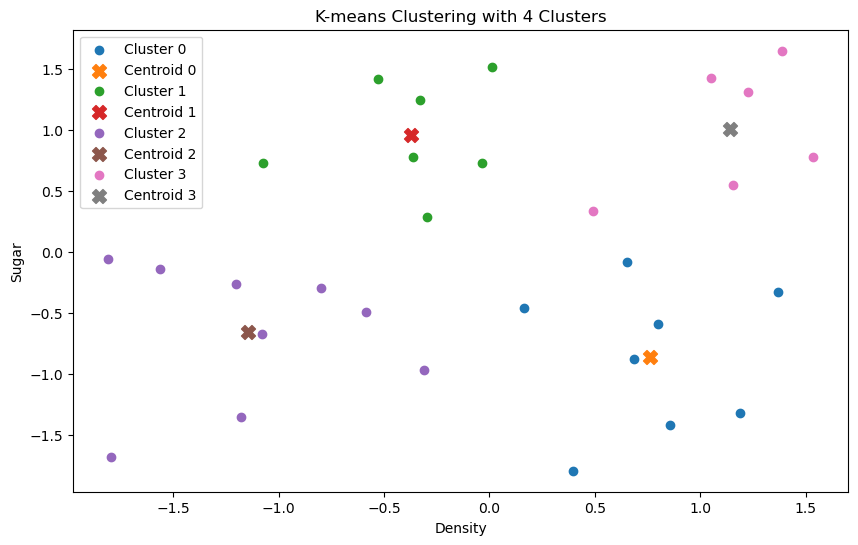

In [2]:
# %%
##############################################################################
# K-MEANS
##############################################################################
####################################################
# Step 3: Create a Model and Train It
####################################################

# Option for the initial centroids
initial_centroids = [
    ('First / Last values', np.array([X.iloc[0], X.iloc[-1]])),
    ('Min / Max values', np.array([[X['density'].min(), X['sugar'].min()], [X['density'].max(), X['sugar'].max()]])),
    ('Random', 'random')
]

for name, model in initial_centroids:
    kmeans = KMeans(n_clusters=2, random_state=0, init=model).fit(X)
    centroids = kmeans.cluster_centers_
    
    print(name, " initial centroids", "\n",
          centroids, "\n")

    # Plot clusters and centroids
    plt.figure(figsize=(10, 6))
    for i in range(2):
        plt.scatter(X.iloc[kmeans.labels_ == i, 0], X.iloc[kmeans.labels_ == i, 1], label=f'Cluster {i}')
        plt.scatter(centroids[i, 0], centroids[i, 1], s=100, label=f'Centroid {i}', marker='X')
    plt.title(f'K-means Clustering with {name} Initial Centroids')
    plt.xlabel("Density")
    plt.ylabel("Sugar")
    plt.legend()
    plt.show()


#%%
# Option for the number of clusters
k_values = [2, 3, 4]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    centroids = kmeans.cluster_centers_
    
    print(k, " Clusters", "\n",
          centroids, "\n")

    # Plot clusters and centroids
    plt.figure(figsize=(10, 6))
    for i in range(k):
        plt.scatter(X.iloc[kmeans.labels_ == i, 0], X.iloc[kmeans.labels_ == i, 1], label=f'Cluster {i}')
        plt.scatter(centroids[i, 0], centroids[i, 1], s=100, label=f'Centroid {i}', marker='X')
    plt.title(f'K-means Clustering with {k} Clusters')
    plt.xlabel("Density")
    plt.ylabel("Sugar")
    plt.legend()
    plt.show()


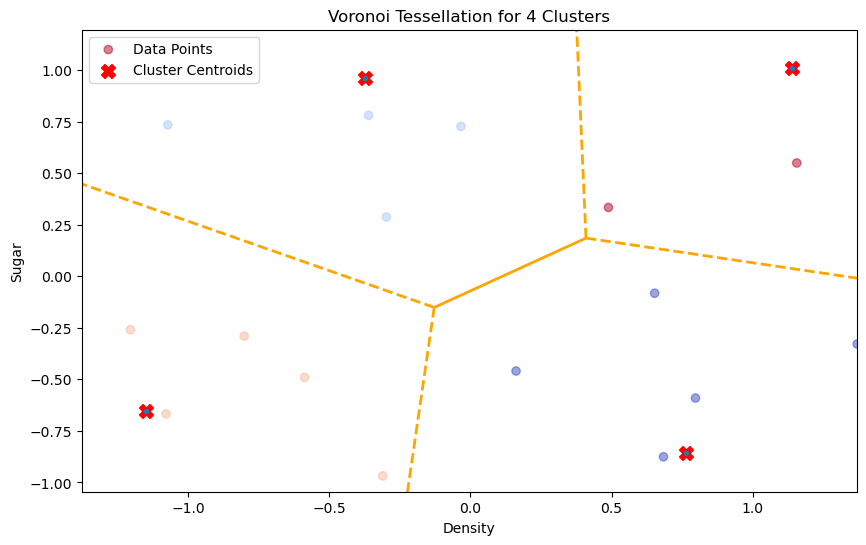

Labels for the DBSCAN with epsilon=0.6 and MinPts=3:
 [ 0 -1  1  1 -1  2  2  2  1  2 -1 -1  1  1 -1  1  1  2  2  2 -1 -1  3  3
  3  0  3  3  0  3]


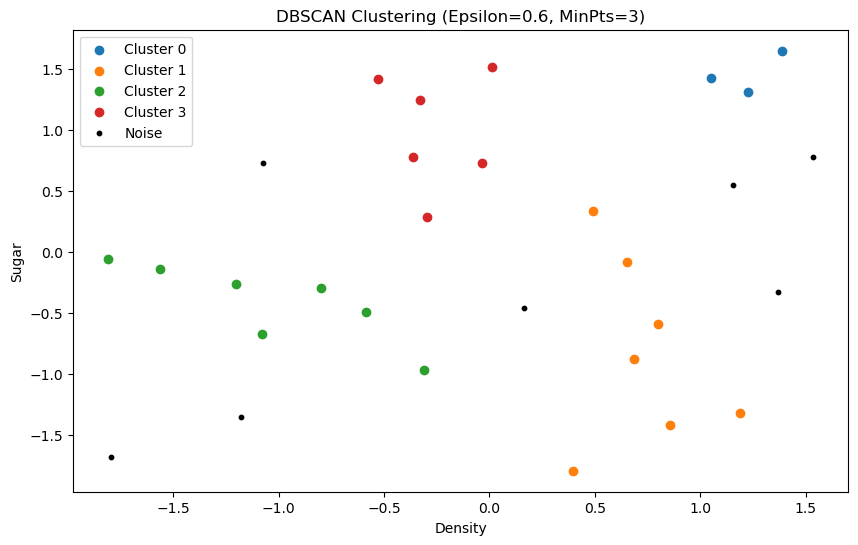

Labels for the DBSCAN with epsilon=0.6 and MinPts=4:
 [-1 -1 -1 -1 -1  0  0  0  1 -1 -1 -1  1 -1 -1  1  1  0  0  0 -1 -1  2  2
  2 -1  2  2 -1  2]


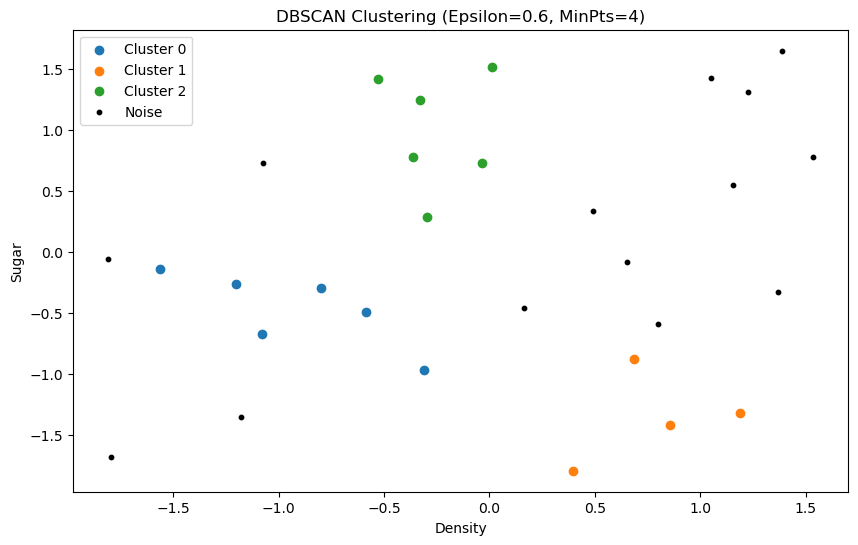

Labels for the DBSCAN with epsilon=0.6 and MinPts=5:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


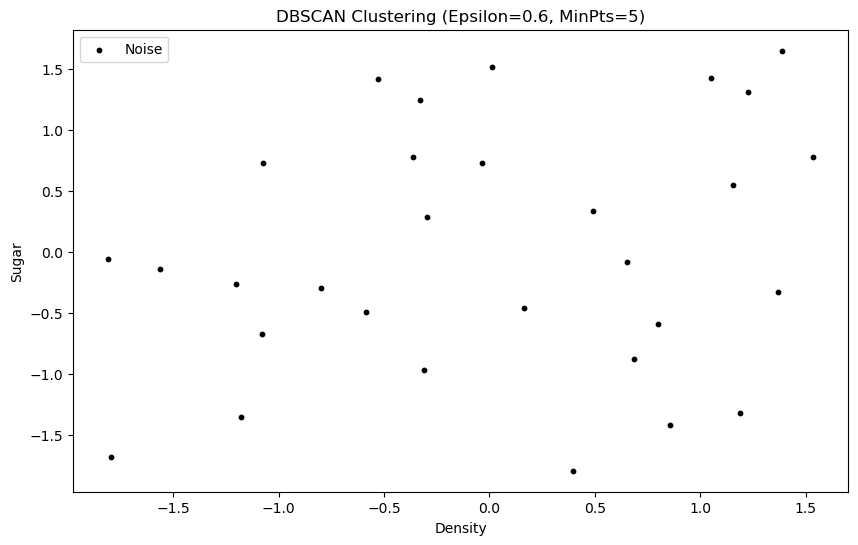

Labels for the DBSCAN with epsilon=0.7 and MinPts=3:
 [ 0  0  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  0  1  1
  1  0  1  1  0  1]


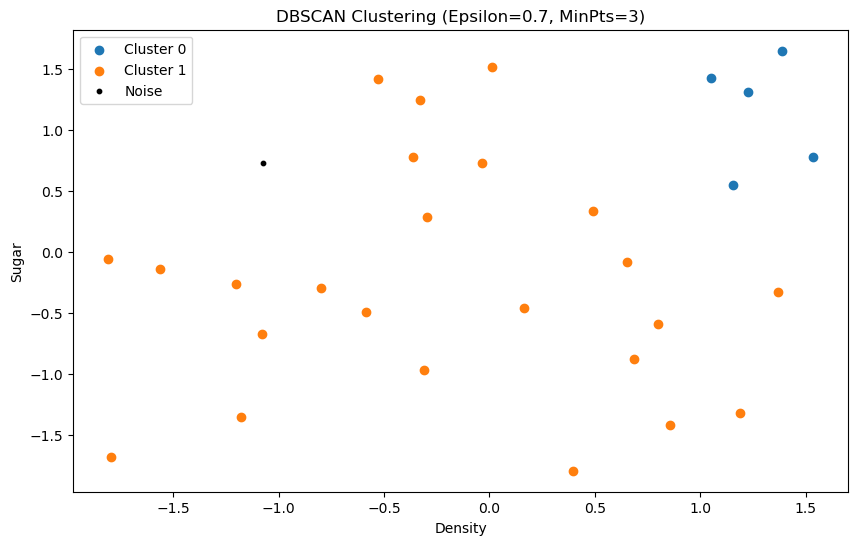

Labels for the DBSCAN with epsilon=0.7 and MinPts=4:
 [ 3  3  0  0  0  1  0  1  0  1 -1  1  0  0 -1  0  0  1  1  1  0 -1  2  2
  2  3  2  2  3  2]


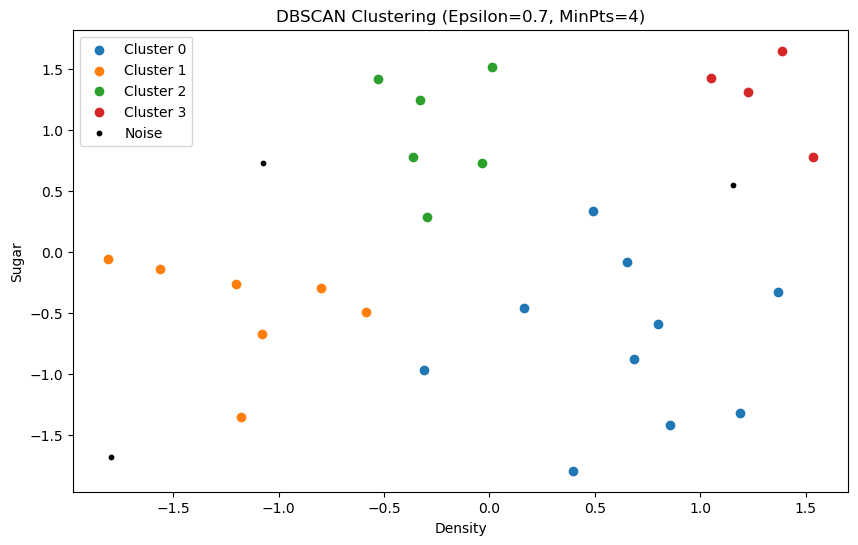

Labels for the DBSCAN with epsilon=0.7 and MinPts=5:
 [-1 -1  0  2  0  1  0  1  0  1 -1  1  0  0 -1 -1  0  1  1  1  0 -1  2  2
  2 -1  2  2 -1  2]


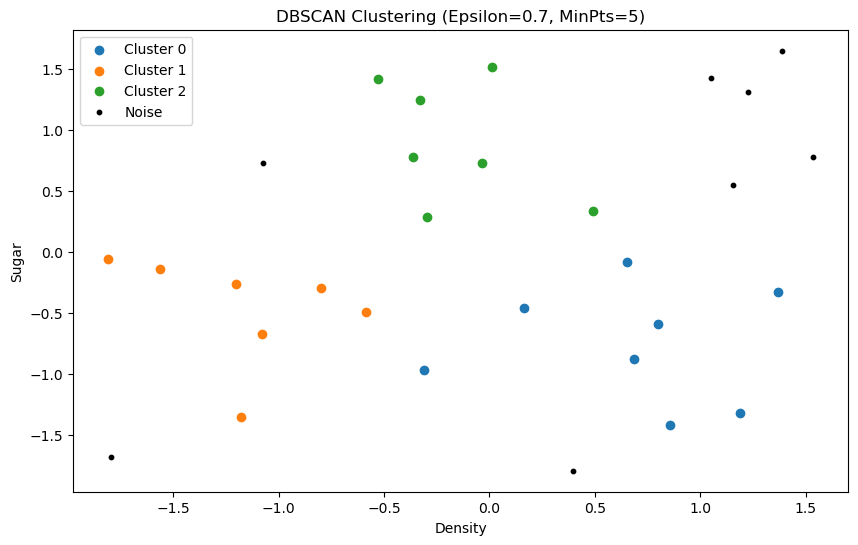

Labels for the DBSCAN with epsilon=0.8 and MinPts=3:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


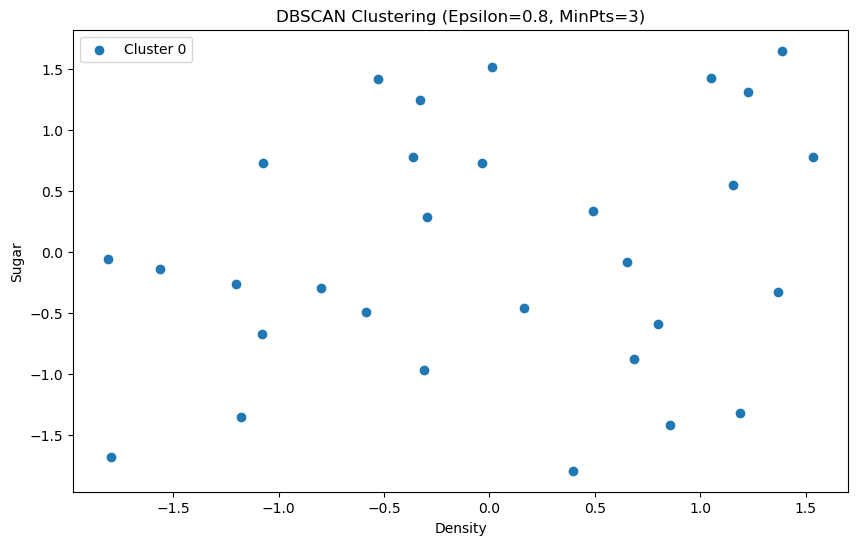

Labels for the DBSCAN with epsilon=0.8 and MinPts=4:
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


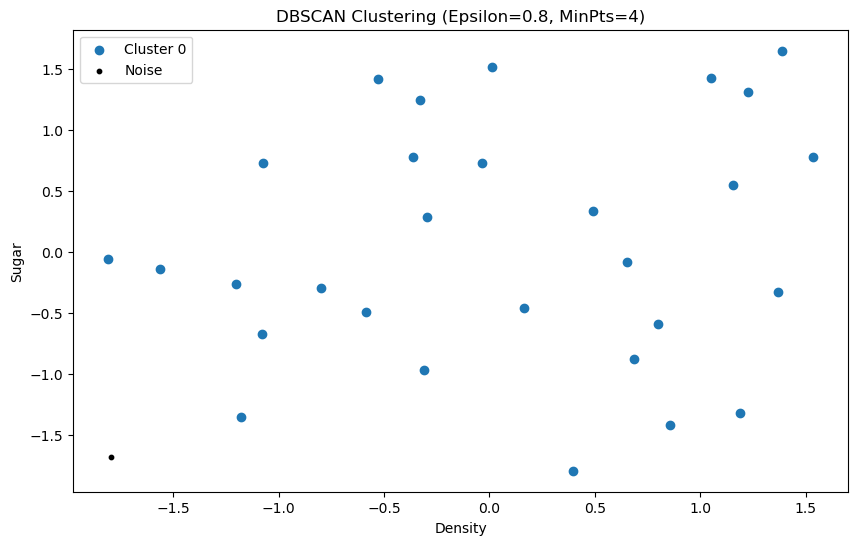

Labels for the DBSCAN with epsilon=0.8 and MinPts=5:
 [ 1  1  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  1  0  0  1  0]


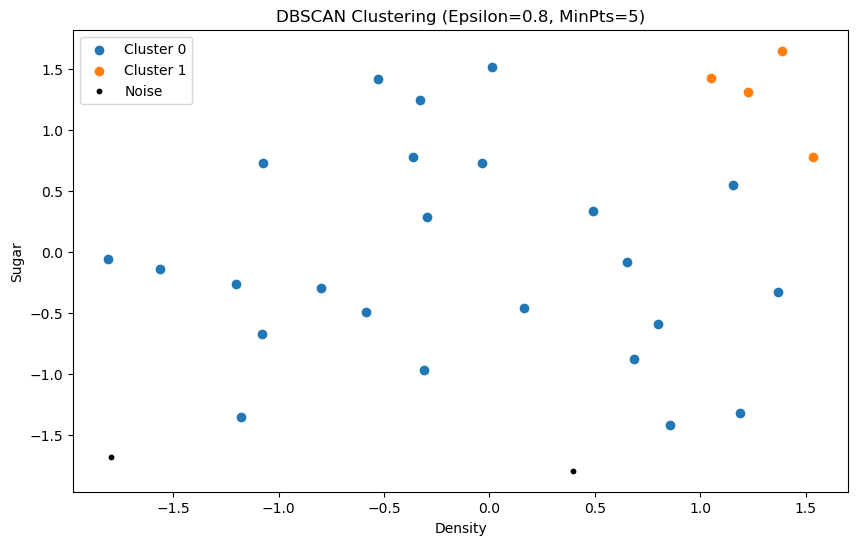

In [3]:

# %%
##############################################################################
# Learning Vector Quantization
##############################################################################

# Skipped!! 

#%%
################
# Voronoi tessellation
################
# Calculate Voronoi tessellation
vor = Voronoi(centroids)

# Plot Voronoi diagram with data points and centroids
plt.figure(figsize=(10, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, show_points=True, line_colors='orange', line_width=2)
plt.scatter(X['density'], X['sugar'], c=kmeans.labels_, cmap='coolwarm', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Cluster Centroids')
plt.title(f'Voronoi Tessellation for {k} Clusters')
plt.xlabel('Density')
plt.ylabel('Sugar')
plt.legend()
plt.show()

# %%
##############################################################################
# DBSCAN
##############################################################################
# Parameters for DBSCAN
epsilon_values = [0.6, 0.7, 0.8]
min_samples_values = [3, 4, 5]

for e in epsilon_values:
    for m in min_samples_values:
        dbscan = DBSCAN(eps=e, min_samples=m).fit(X)
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        unique_labels = set(dbscan.labels_)
        
        print(f'Labels for the DBSCAN with epsilon={e} and MinPts={m}:\n {dbscan.labels_}')

         # Plot clusters
        plt.figure(figsize=(10, 6))
        for label in unique_labels:
            if label == -1:
                plt.scatter(X.iloc[dbscan.labels_ == label, 0], X.iloc[dbscan.labels_ == label, 1],
                            c='k', marker='o', s=10, label='Noise')
            else:
                plt.scatter(X.iloc[dbscan.labels_ == label, 0], X.iloc[dbscan.labels_ == label, 1],
                            label=f'Cluster {label}')
        plt.title(f'DBSCAN Clustering (Epsilon={e}, MinPts={m})')
        plt.xlabel("Density")
        plt.ylabel("Sugar")
        plt.legend()
        plt.show()
